# Introduction

This notebook demonstrates how to generate various slabs for a material using surface.py. In addition, it will also demonstrate how to obtain the Wulff shape with a set of surface energies associated with Miller indices.

# References

R. Tran, Z. Xu, B. Radhakrishnan, D. Winston, W. Sun, K. A. Persson, S. P. Ong, "Surface Energies of Elemental Crystals", Scientific Data, 2016, 3:160080, doi:10.1038/sdata.2016.80.

Sun, W.; Ceder, G. Efficient creation and convergence of surface slabs, Surface Science, 2013, 617, 53–59, doi:10.1016/j.susc.2013.05.016.

In [ ]:
# Uncomment the subsequent lines in this cell to install dependencies for Google Colab.
# !pip install pymatgen==2022.7.19

In [ ]:
# Import the necessary tools for making a Wulff shape
from pymatgen.analysis.wulff import WulffShape

# Import the necessary tools to generate surfaces
from pymatgen.core.surface import Lattice, SlabGenerator, Structure, generate_all_slabs

In [ ]:
# Let's start with fcc Ni
lattice = Lattice.cubic(3.508)
Ni = Structure(
    lattice,
    ["Ni", "Ni", "Ni", "Ni"],
    [[0, 0, 0], [0, 0.5, 0], [0.5, 0, 0], [0, 0, 0.5]],
)

In [ ]:
# We'll use the SlabGenerator class to get a single slab. We'll start with the
# (111) slab of Ni. Plug in the CONVENTIONAL unit cell of your structure, the
# maximum Miller index value to generate the different slab orientations along
# with the minimum slab and vacuum size in Angstroms
slabgen = SlabGenerator(Ni, (1, 1, 1), 10, 10)

# If we want to find all terminations for a particular Miller index orientation,
# we use the get_slabs() method. This returns a LIST of slabs rather than a single
# slab. When generating a slab for a particular orientation, there are sometimes
# more than one location we can terminate or cut the structure to create a slab. The
# simplest example of this would be the Si(Fd-3m) (111) slab which can be cut or
# terminated in two different locations along the vector of the Miller index. For a
# fcc structure such as Ni however, there should only be one way to cut a (111) slab.
all_slabs = slabgen.get_slabs()
print("The Ni(111) slab only has %s termination." % (len(all_slabs)))

The Ni(111) slab only has 1 termination.


In [ ]:
# Let's try this for a diamond Silicon structure
lattice = Lattice.cubic(5.46873)
Si = Structure(
    lattice,
    ["Si", "Si", "Si", "Si", "Si", "Si", "Si", "Si"],
    [
        [0.00000, 0.00000, 0.50000],
        [0.75000, 0.75000, 0.75000],
        [0.00000, 0.50000, 0.00000],
        [0.75000, 0.25000, 0.25000],
        [0.50000, 0.00000, 0.00000],
        [0.25000, 0.75000, 0.25000],
        [0.50000, 0.50000, 0.50000],
        [0.25000, 0.25000, 0.75000],
    ],
)

slabgen = SlabGenerator(Si, (1, 1, 1), 10, 10)
print(
    "Notice now there are actually now %s terminations that can be \
generated in the (111) direction for diamond Si"
    % (len(slabgen.get_slabs()))
)

# The simplest way to do this is to just use generate_all_slabs which finds all the unique
# Miller indices for a structure and uses SlabGenerator to create all terminations for all of them.
all_slabs = generate_all_slabs(Si, 3, 10, 10)
print(
    "%s unique slab structures have been found for a max Miller index of 3"
    % (len(all_slabs))
)

Notice now there are actually now 2 terminations that can be generated in the (111) direction for diamond Si
18 unique slab structures have been found for a max Miller index of 3


In [ ]:
# What are the Miller indices of these slabs?
for slab in all_slabs:
    print(slab.miller_index)
print(
    "Notice some Miller indices are repeated. Again, this is due to there being more than one termination"
)

(1, 1, 1)
(1, 1, 1)
(3, 3, 2)
(3, 3, 1)
(3, 3, 1)
(1, 1, 0)
(3, 2, 2)
(3, 2, 2)
(3, 2, 1)
(3, 2, 0)
(3, 1, 1)
(3, 1, 1)
(3, 1, 0)
(1, 0, 0)
(2, 2, 1)
(2, 2, 1)
(2, 1, 1)
(2, 1, 0)
Notice some Miller indices are repeated. Again, this is due to there being more than one termination


# Calculating the surface energy
To do this, we actually need to calculate (from first principles) the total energy of two structures. The total energy of the bulk ($E_{bulk}$) (preferably the oriented unit cell corresponding to the slab) and the total energy of the slab($E_{slab}$) which is several layers of atoms interfaced with a vacuum. Using the following equation, we can get the surface energy $\gamma = \frac{E_{slab}-E_{bulk}}{2A}$ where both slab and bulk systems have the same number of atoms and species (you can multiply $E_{bulk}$ where n is the number of oriented unit cell layers contained in your slab system relative ot your bulk system). The factor of 1/2 accounts for the two surfaces in our slab model so $\gamma$ is the surface energy of one surface.

# Some basic properties of the Wulff shape

Using the WulffShape class, there are a couple of properties we can get. Here we will explain what some of them are.

weighted_surface_energy:

Surface Gibbs free energy for a crystal is given by $\Delta G=\sum\limits_{hkl}\gamma_{hkl}A_{hkl}$. Where $\gamma_{hkl}$ is the surface energy of facet (hkl) and $A_{hkl}$ is the surface area of that particular facet that occupies the Wulff shape. We can normalize this value with the total surface area of the Wulff shape to get the weighted (average) surface energy for a particular material $\bar{\gamma}=\frac{\Delta G}{\sum\limits_{hkl}A_{hkl}}$

anisotropy:

Typically in the literature when discussing surface anisotropy, we would only look at the ratios of 2 surface energies when talking about anisotropy. eg. the ratio of a generic fcc (111) to (100) surface energy should be less than 1 as the (111) facet is the closest packed surface of an fcc structure and should have the lowest surface energy. However this method of determining surface anisotropy does not allow us to determine an overall anisotropy of a material, ie. how different are all the surface energies for a material. As such, we used the Coefficient of Variation from the weighted surface energy. For reference, an ideal sphere Wulff shape (eg. completely isotropic) has a anisotropy of 0.

shape_factor:

An alternative to anisotropy. This is useful for determining the critical nucleus size. A large shape factor indicates great anisotropy.
See Ballufi, R. W., Allen, S. M. & Carter, W. C. Kinetics of Materials. (John Wiley & Sons, 2005), p.461

shape factor: 5.178, anisotropy: 0.070, weighted surface energy: 2.035 J/m^2


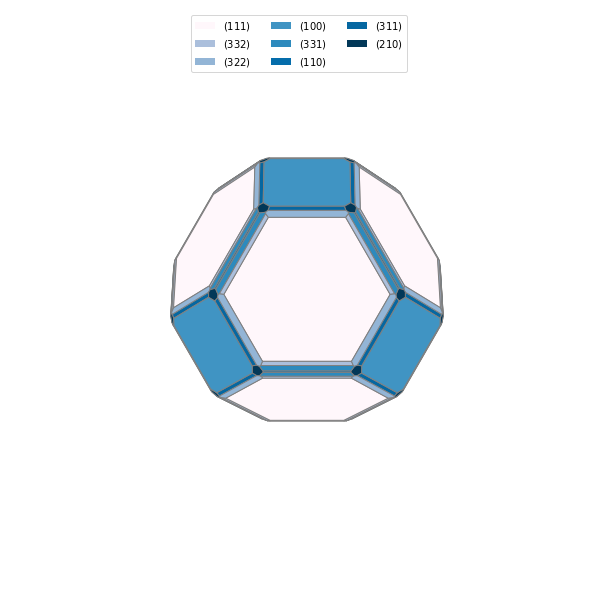

In [ ]:
# Now let's assume that we then calculated the surface energies for these slabs

# Surface energy values in J/m^2
surface_energies_Ni = {
    (3, 2, 0): 2.3869,
    (1, 1, 0): 2.2862,
    (3, 1, 0): 2.3964,
    (2, 1, 0): 2.3969,
    (3, 3, 2): 2.0944,
    (1, 0, 0): 2.2084,
    (2, 1, 1): 2.2353,
    (3, 2, 2): 2.1242,
    (3, 2, 1): 2.3183,
    (2, 2, 1): 2.1732,
    (3, 3, 1): 2.2288,
    (3, 1, 1): 2.3039,
    (1, 1, 1): 1.9235,
}
miller_list = surface_energies_Ni.keys()
e_surf_list = surface_energies_Ni.values()

# We can now construct a Wulff shape with an accuracy up to a max Miller index of 3
wulffshape = WulffShape(Ni.lattice, miller_list, e_surf_list)

# Let's get some useful information from our wulffshape object
print(
    "shape factor: %.3f, anisotropy: \
%.3f, weighted surface energy: %.3f J/m^2"
    % (
        wulffshape.shape_factor,
        wulffshape.anisotropy,
        wulffshape.weighted_surface_energy,
    )
)


# If we want to see what our Wulff shape looks like
wulffshape.show()

In [ ]:
# Lets try something a little more complicated, say LiFePO4
from pymatgen.util.testing import PymatgenTest

# Get the LiFePO4 structure
LiFePO4 = PymatgenTest.get_structure("LiFePO4")

# Let's add some oxidation states to LiFePO4, this will be
# important when we want to take surface polarity into consideration
LiFePO4.add_oxidation_state_by_element({"Fe": 2, "Li": 1, "P": 5, "O": -2})
slabgen = SlabGenerator(LiFePO4, (0, 0, 1), 10, 10)

For the (001) slab of LiFePO4, there are 5 terminations.
True False
True False
True False
True False
False False


When generating a slab of LiFePO4, we also want to be careful 
not break any of the P-O bonds. These bonds are strong 
enough that they will result in a significantly high surface 
energy when broken so its reasonable to say that any terminations 
with such broken bonds will not yield the lowest surface energy. To
implement this, we add the bonds parameter to get_slabs, a dictionary 
where the key will be two atoms whose bonds we do not want to break 
and the element of that value would be their maximum bond length.

In [ ]:
all_slabs = slabgen.get_slabs(bonds={("P", "O"): 2})
# any bond between P and O less than 2 Angstroms cannot be broken when generating slabs
print("For the (001) slab of LiFePO4, there are %s terminations." % (len(all_slabs)))

For the (001) slab of LiFePO4, there are 5 terminations.


There are a couple of rules before we actually run calculations on some of these 
slab models. First off, we need to ensure that all slabs we will be calculating have 
the same surface on both sides. To do this, we need to ensure the slab model has Laue 
point group symmetry ie. contains inversion symmetry. We use the is_symmetric() 
property of our slab object to check this. It's important that both surfaces are the 
same as the above equation for surface energy is used to get the energy of one surface, 
hence the 1/2 factor in the equation. If the surfaces are different (the slab is not 
symmetric), we would be calculating the average surface energy of two different surfaces 
in our slab rather than the surface energy for one slab in our calculation. Secondly, 
for structures containing oxidation states, we need to ensure that our surfaces are 
nonpolar. A polar termination will lead to a very high surface energy, so we can skip 
those particular structures. We can check polarity using the is_polar() property of 
our slab object. Both these criterias (nonpolar and symmetric) should be satisfied 
before calculating a particular slab model.

In [ ]:
for slab in all_slabs:
    print(slab.is_polar(), slab.is_symmetric())
# Notice that none of the terminations in the (001) direction do not simultaneously satisfy
# our two criteria so a (001) surface with a reasonable surface energy cannot be calculated.
# In such cases, we need to modify the surfaces of our slabs. A future release of surface.py
# will implement such modification techniques for these cases.

True False
True False
True False
True False
False False


In [ ]:
# Now let's generate all possible slabs for a max Miller index of 2 for LiFePO4 and see if
# any of these surfaces can be calculated to yield reasonable and accurate surface energy
# values. This may take a while.
all_slabs = generate_all_slabs(LiFePO4, 2, 10, 10, bonds={("P", "O"): 2})

In [ ]:
print(
    "There is a total of %s slabs generated including polar, asymmetric, and \
P-O terminated slabs"
    % (len(all_slabs))
)

# store any slabs for calculation that satisfies our criterias
valid_slabs = []
for slab in all_slabs:
    if not slab.is_polar() and slab.is_symmetric():
        print(slab.miller_index)
        valid_slabs.append(slab)

print(
    "Number of slabs that are nonpolar, symmetric and do not terminate P-O bonds: %s"
    % (len(valid_slabs))
)

There is a total of 210 slabs generated including polar, asymmetric, and P-O terminated slabs
(1, 0, 1)
(1, 2, 1)
Number of slabs that are nonpolar, symmetric and do not terminate P-O bonds: 2
